In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
covid =pd.read_csv('https://raw.githubusercontent.com/samchak18/Capstone_Project_3_Coronavirus-Tweet-Sentiment-Analysis/main/Coronavirus%20Tweets.csv',encoding='latin-1')
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
covid.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
covid.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
covid.shape

(41157, 6)

In [ ]:
covid.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
covid.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
most_frequent_sentiment = covid['Sentiment'].mode()[0]
covid['Sentiment'].fillna(most_frequent_sentiment, inplace=True)

In [ ]:
covid.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
covid1=covid[['OriginalTweet','Sentiment']]
covid1.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
covid1.describe().T

,count,unique,top,freq
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
Sentiment,41157,5,Positive,11422


In [ ]:
covid1.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
covid1.shape

(41157, 2)

In [ ]:
len(covid1[covid1.duplicated()])

0

In [ ]:
covid1["OriginalTweet"] = covid1["OriginalTweet"].str.lower()
covid1['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [ ]:
covid1['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
covid1['OriginalTweet'] = covid1['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
covid1["clean_tweets"] = covid1['OriginalTweet'].apply(remove_punctuations)

In [ ]:
covid1['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
covid1['clean_tweets'] = covid1['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
covid1.head()

,OriginalTweet,Sentiment,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [ ]:
covid1['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

In [ ]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
covid1['clean_tweets']= covid1['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [ ]:
covid1.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
covid1['stemmed'] = covid1['clean_tweets'].apply(lambda x: stemming(x))

In [ ]:
covid1.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid outbreak im paranoi...
Name: stemmed, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
covid1['lemmed'] = covid1['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
covid1.head()

,OriginalTweet,Sentiment,clean_tweets,stemmed,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[food, stock, one, empty, please, dont, panic,..."
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,"[ready, go, supermarket, covid, outbreak, im, ..."


In [ ]:
sentiment_count = covid1['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

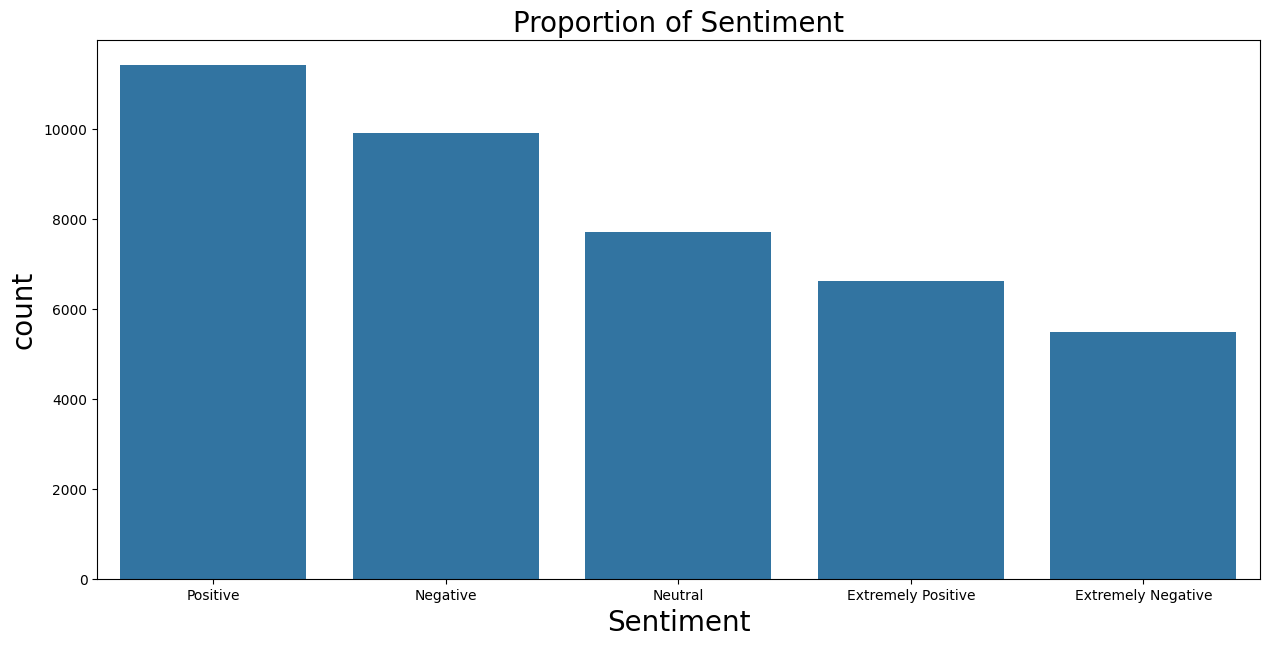

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

In [ ]:
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
covid1 = covid1.replace(replace_values)

In [ ]:
sentiment_count1 = covid1['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


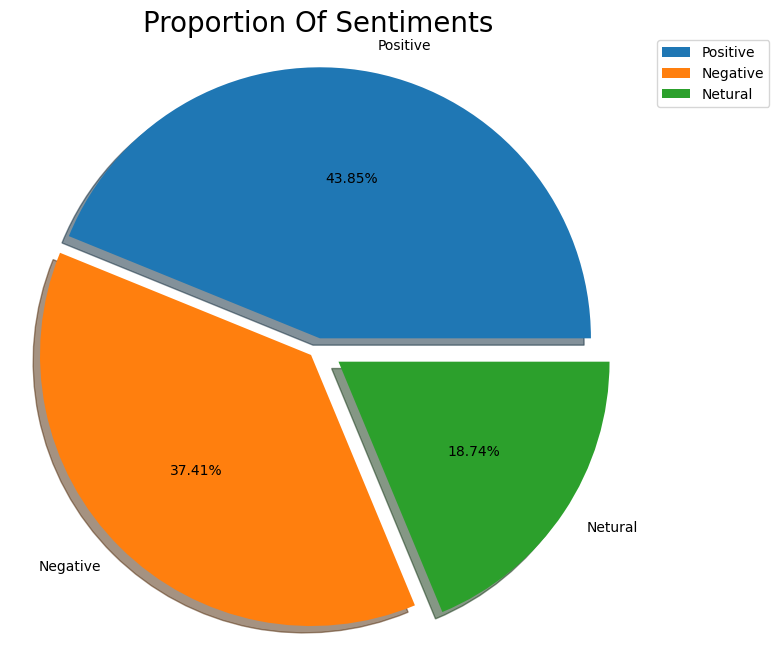

In [ ]:
sentiment_count1 = covid1['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
covid1['temp_list'] = covid1['clean_tweets'].apply(lambda x:str(x).split())

In [ ]:
from collections import Counter
top = Counter([item for sublist in covid1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid',",18286
1,"'coronavirus',",12991
2,"'prices',",7406
3,"'store',",6626
4,"'food',",6612
5,"'supermarket',",6410
6,"'grocery',",5790
7,"'people',",5067
8,"'amp',",4912
9,"'consumer',",4085


In [ ]:
neutral = pd.DataFrame(covid1[['stemmed','lemmed']] [covid1['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(covid1[['stemmed','lemmed']]  [covid1['Sentiment'] == 'Positive'])
negative = pd.DataFrame(covid1[['stemmed','lemmed']]  [covid1['Sentiment'] == 'Negative'])

In [ ]:
X= covid1['lemmed']
y=covid1['Sentiment']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [ ]:
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [ ]:
print(X_train.head())
y_train.head()

23805    [target, pull, back, store, remodels, opening,...
31828    [breaking, msf, call, patent, profiteering, dr...
24504    [coronavirus, spread, world, leader, get, toug...
17281    [store, shelf, empty, people, selling, certain...
11488    [fresco, u, normal, night, final, reduction, n...
Name: lemmed, dtype: object


23805     Neutral
31828    Negative
24504    Negative
17281    Positive
11488     Neutral
Name: Sentiment, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())

In [ ]:
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [ ]:
pred_lr_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [ ]:
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7828798185941043


In [ ]:

label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79      4620
     Neutral       0.68      0.68      0.68      2314
    Positive       0.82      0.83      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.76      0.76      0.76     12348
weighted avg       0.78      0.78      0.78     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

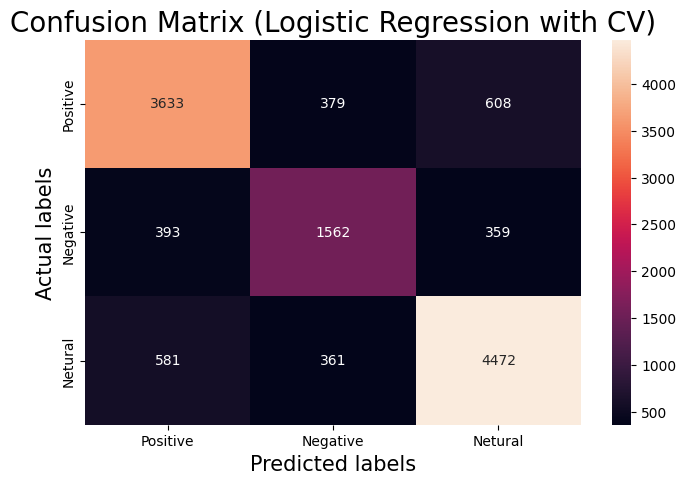

In [ ]:
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
dt_cv=DecisionTreeClassifier()
dt_cv.fit(cv_X_train,y_train)
pred_dt_cv=dt_cv.predict(cv_X_test)

In [ ]:
pred_dt_cv

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6890553911292712


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.68      0.68      0.68      4620
     Neutral       0.61      0.65      0.63      2314
    Positive       0.75      0.74      0.75      5414

    accuracy                           0.70     12348
   macro avg       0.68      0.69      0.69     12348
weighted avg       0.70      0.70      0.70     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

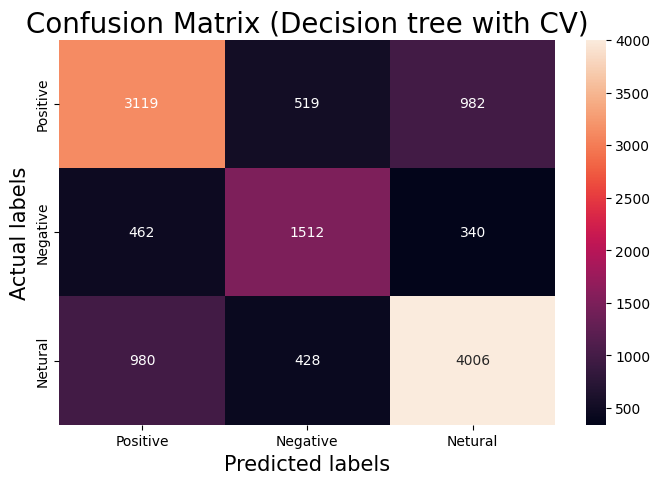

In [ ]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [ ]:
pred_svm_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7607709750566893


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.75      0.76      4620
     Neutral       0.65      0.66      0.66      2314
    Positive       0.80      0.81      0.80      5414

    accuracy                           0.76     12348
   macro avg       0.74      0.74      0.74     12348
weighted avg       0.76      0.76      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

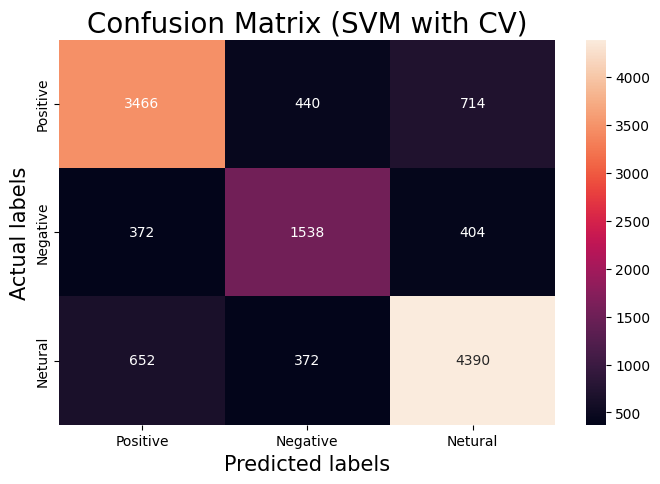

In [ ]:
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)